## Análise Exploratória de Dados

Neste notebook usaremos uma pesquisa recente nos EUA sobre o mercado de trabalho para programadores de software, Nosso objetivo aqui é fazer uma investigação inicial dos dados a fim de detectar problemas como os dados, necessecidades de mais variáveis, falhas na organização e necessidade de transformação.

Pesquisa salárial realizada pelo site http://www.freecodecamp.com/ com programadores de software nos EUA que frequentaram treinamentos Bootcamp.

In [1]:
# importando pacotes, pydata stack
# color sys, vamos gera muitos gráficos com aparencia profissional
# import warning para bloquear as mensage de Future Warning

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import colorsys
plt.style.use('seaborn-talk')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# importando o Dataset
# low_memory - baixa_memória

df = pd.read_csv('Dados-Pesquisa.csv', sep=',', low_memory=False)

In [3]:
# mostra as 5 primeiras linhas
# como o dataframe tem muitas variáveis ele coloca uma contra barra
# simbolizando próxima linha.
# quando a visualização está assim abaixo tem a solução.

print(df.head())

    Age  AttendedBootcamp  BootcampFinish  BootcampFullJobAfter  \
0  28.0               0.0             NaN                   NaN   
1  22.0               0.0             NaN                   NaN   
2  19.0               0.0             NaN                   NaN   
3  26.0               0.0             NaN                   NaN   
4  20.0               0.0             NaN                   NaN   

   BootcampLoanYesNo  BootcampMonthsAgo BootcampName  BootcampPostSalary  \
0                NaN                NaN          NaN                 NaN   
1                NaN                NaN          NaN                 NaN   
2                NaN                NaN          NaN                 NaN   
3                NaN                NaN          NaN                 NaN   
4                NaN                NaN          NaN                 NaN   

   BootcampRecommend  ChildrenNumber  ... ResourceSoloLearn  \
0                NaN             NaN  ...               NaN   
1             

In [4]:
# imprima somente a tabela
# canto esquerdo os indexes
# cabeçalho as variáveis - colunas 
# vejamos que temos muitos valores missing - NA
# e temos várias linhas
# próximo objetivo é explorar o DataFrame

df

,Age,AttendedBootcamp,BootcampFinish,BootcampFullJobAfter,BootcampLoanYesNo,BootcampMonthsAgo,BootcampName,BootcampPostSalary,BootcampRecommend,ChildrenNumber,...,ResourceSoloLearn,ResourceStackOverflow,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3Schools,ResourceYouTube,SchoolDegree,SchoolMajor,StudentDebtOwe
0,28.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"some college credit, no degree",NaN,20000.0
1,22.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,"some college credit, no degree",NaN,NaN
2,19.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,high school diploma or equivalent (GED),NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bachelor's degree,Cinematography And Film,7000.0
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"some college credit, no degree",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15615,39.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,bachelor's degree,Chemistry,NaN
15616,27.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,bachelor's degree,Electrical Engineering,NaN
15617,37.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bachelor's degree,Chemistry,NaN
15618,26.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,master's degree (non-professional),Math,NaN


In [5]:
# próxima etapa é dar um describe
# resumo estatístico do meu Dataframe
# count - para cada coluna quantidade
# mean - para cada coluna média
# std - para cada coluna desvio padrão
# min - para cada coluna o valor mínimo
# max - para cada coluna o valor máximo
# quartis - de 25% - 50% - 75%
# Ou seja quem já tem uma experiência em análise de dados
# já tem uma ideia de como está a distribuição dos dados.
# Se eles estão muitos disperços ou não
# Se eles estão agrupados, entre vários outros insights

print(df.describe())

                Age  AttendedBootcamp  BootcampFinish  BootcampFullJobAfter  \
count  13613.000000      15380.000000      933.000000            635.000000   
mean      29.175421          0.061964        0.689175              0.584252   
std        9.017716          0.241097        0.463080              0.493239   
min       10.000000          0.000000        0.000000              0.000000   
25%       23.000000          0.000000        0.000000              0.000000   
50%       27.000000          0.000000        1.000000              1.000000   
75%       33.000000          0.000000        1.000000              1.000000   
max       86.000000          1.000000        1.000000              1.000000   

       BootcampLoanYesNo  BootcampMonthsAgo  BootcampPostSalary  \
count         934.000000         631.000000          330.000000   
mean            0.332976           9.055468        63740.506061   
std             0.471531          12.968035        26347.200265   
min             0.00

In [6]:
# listando todas as colunas
# uma observação cada atributo é uma variável
# não podemos ter 1 atributo em varias colunas
# exemplo data de nascimento
# dia, mês, ano
# data de nascimento (dia-mês-ano) foram uma variável em 3 colunas.
# o fato de ter 85 colunas não seja o fato de eu ter 85 variáveis
# tem coluna que não serve para nada em minha analise
# posso ter colunas ou seja 3 ou mais atributos epalhados em outras
# colunas 
# posso ter atributos que vão fazer todo sentido a minha pesquisa

list(df)

['Age',
 'AttendedBootcamp',
 'BootcampFinish',
 'BootcampFullJobAfter',
 'BootcampLoanYesNo',
 'BootcampMonthsAgo',
 'BootcampName',
 'BootcampPostSalary',
 'BootcampRecommend',
 'ChildrenNumber',
 'CityPopulation',
 'CodeEventBootcamp',
 'CodeEventCoffee',
 'CodeEventConferences',
 'CodeEventDjangoGirls',
 'CodeEventGameJam',
 'CodeEventGirlDev',
 'CodeEventHackathons',
 'CodeEventMeetup',
 'CodeEventNodeSchool',
 'CodeEventNone',
 'CodeEventOther',
 'CodeEventRailsBridge',
 'CodeEventRailsGirls',
 'CodeEventStartUpWknd',
 'CodeEventWomenCode',
 'CodeEventWorkshop',
 'CommuteTime',
 'CountryCitizen',
 'CountryLive',
 'EmploymentField',
 'EmploymentFieldOther',
 'EmploymentStatus',
 'EmploymentStatusOther',
 'ExpectedEarning',
 'FinanciallySupporting',
 'Gender',
 'HasChildren',
 'HasDebt',
 'HasFinancialDependents',
 'HasHighSpdInternet',
 'HasHomeMortgage',
 'HasServedInMilitary',
 'HasStudentDebt',
 'HomeMortgageOwe',
 'HoursLearning',
 'ID.x',
 'ID.y',
 'Income',
 'IsEthnicMinorit

## Distribuição de Idade

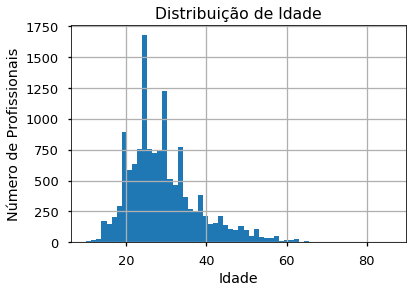

In [7]:
# gráfico histograma, distribuição de frequência dentro do meus dados
# Problema a resolver:
# A maioria dos profissionais que trabalha com programador de 
# software estão na faixa de idade entre 20 e 30 anos, sendo 25 anos
# a idade mais frequente?
# promissora idade
# bins - caixinhas

# gerando histograma
df.Age.hist(bins = 60)
plt.xlabel('Idade')
plt.ylabel('Número de Profissionais')
plt.title('Distribuição de Idade')
plt.show()

Distribuição frequente do número de idade de profissionais.
O gráfico que indica que a maior frequência de idade é de 20 à 40 anos.
Sendo que o menor índice de idade é de 20 para baixo.
E Temos uma frequência boa de programadores com idade maior que 40 anos.

## Distribuição de Sexo

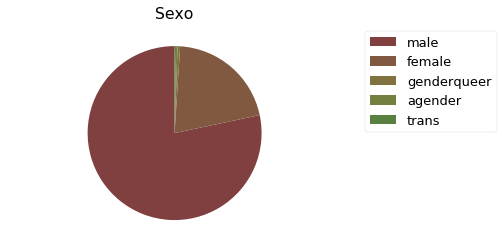

In [8]:
# grande maioria dos programadores são do sexo feminino?

# definindo a quantidade, coletar as labels
# pode ter mais de 1 sexo no dataset, masc, fem, ñdivulgado, etc..
labels = df.Gender.value_counts().index

# calcular a quantidade para cada label
# use len(), calcula o cumprimento
# contabilizando os elementos por cada uma das labels
# no campo de employment field - campo de emprego
num = len(df.EmploymentField.value_counts().index)

# criando lista de cores
# lista do employment field
# Map pega uma lista e a transforma numa nova lista
# executando algum tipo de operação em cada elemento.
# lambda função em tempo de execução

listaHSV = [(x*1.0/num, 0.5, 0.5) for x in range(num)]
listaRGB = list(map(lambda x: colorsys.hsv_to_rgb(*x), listaHSV))

# gráficos de Pizza
fatias, texto = plt.pie(df.Gender.value_counts(), colors=listaRGB, startangle=90)
plt.axes().set_aspect('equal', 'datalim')
plt.legend(fatias, labels, bbox_to_anchor = (1.05, 1))
plt.title('Sexo')
plt.show()

Temos já algumas predições que a maioria dos programadores tem a idade entre 20 a 40 anos sendo o pico em 35.
A maioria de programadores são do sexo male.
Já dar para tomar algumas decisões no meu modelo preditivo eu vou considerar pessoas com outra faixe de idade.
considerar pessoas de outro sexo além, do sexo male, female, trans que está na minha análise.
Isto é uma decisão de cientista de dados.

## Distribuição de Interesse

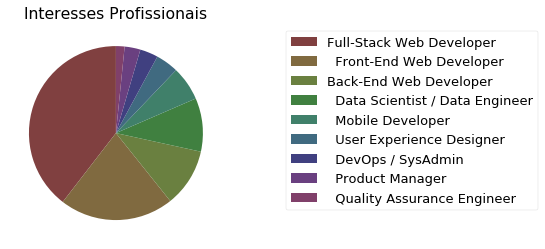

In [9]:
# EVIDÊNCIA
# quais são os principais interesses dos participantes da pesquisa?
# O principal interesse profissional dos programadores é o 
# desenvolvimento web(full-stack, front-end, back-end).
# seguido pela área de data science?

# definindo a quantidade
# pegando pelo cumprimento do atributo JobRoleInterest
# quantidade de lementos
num = len(df.JobRoleInterest.value_counts().index)

# craindo lista de cores
# função build in de cores do colorsys

listaHSG = [(x*1.0/num, 0.5, 0.5) for x in range(num)]
listaRGB = list(map(lambda x: colorsys.hsv_to_rgb(*x), listaHSG))

labels = df.JobRoleInterest.value_counts().index
colors = ['OliveDrap', 'Orange', 'OrangeRed', 'DarkCyan', 'Salmon', 'Sienna', 'Marron', 'LightSlateGrey', 'DimGray']

# gráficos de pizza
fatias, texto = plt.pie(df.JobRoleInterest.value_counts(), colors=listaRGB, startangle=90)
plt.legend(fatias, labels, bbox_to_anchor = (1.25, 1))
plt.title('Interesses Profissionais')
plt.show()

A pesquisa que estamos fazendo é de um site de programadores web.
Então não iremos encotrar médicos, advogados outro público para este site.
MUITO CUIDADO!
Com que chamamos de views se eu firzer qualquer inferencia nesta pesquisa eu estarei sendo tendenssioso, por que a pesquisa foi feita por um site que com este perfil profissional no mercado.
Se eu estiver que fhegar em evidência de todos os profissionais programadores dos EUA eu precisaria de mais pesquisas de outros todos os programadores dos EUA.
Não é facil envolve decisão pessoal do profissional a medida que ele vai conhecendo melhor os dados.

## Distribuição de Empregabilidade

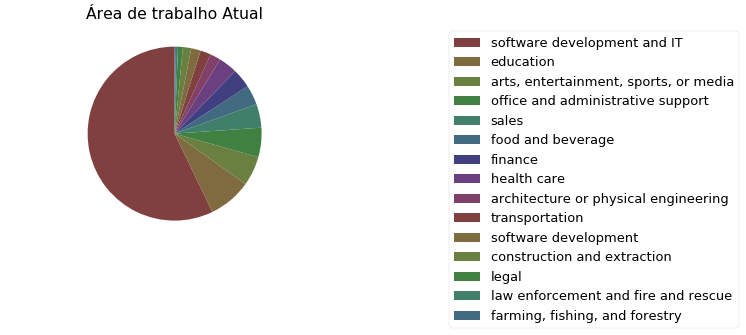

In [10]:
# Quais as áreas de negócio em que os participantes da pesquisa trabalha?
# A maioria dos programadores trabalha na área de desenvolvimento de 
# software e TI, mas outras áreas como finanças e saúde também são
# significativas

# definindo a quantidade
num = len(df.EmploymentField.value_counts().index)
# criando a lista de cores
listaHSV = [(x*1.0/num, 0.5, 0.5) for x in range(num)]
listaRGB = list(map(lambda x: colorsys.hsv_to_rgb(*x), listaHSG))
labels = df.EmploymentField.value_counts().index

# gráfico de pizza
fatias, texto = plt.pie(df.EmploymentField.value_counts(), colors=listaRGB, startangle=90)
plt.axes().set_aspect('equal', 'datalim')
plt.legend(fatias, labels, bbox_to_anchor = (1.3, 1))
plt.title('Área de trabalho Atual')
plt.show()

Se eu fosse uma empresa de recrutamento e seleção, eu usaria este resultado e molharia o minha estratégia de seleção dos profissionais de acordo com as áreas para as quais eu presto serviço.
A maioria dos participantes da pesquisa trabalham na área de software e TI.

## <font color='blue'> Até aqui não precisamos lhe dar com nenhum dados missing, tratamento de outlies, não aplicamos nenhuma tecnica estatística para extrair nunhuma informação a mais dos dados, não fizemos nenhuma transformação dos dados estamos explorando os dados.</font>

## Preferência de Trabalho por Idade

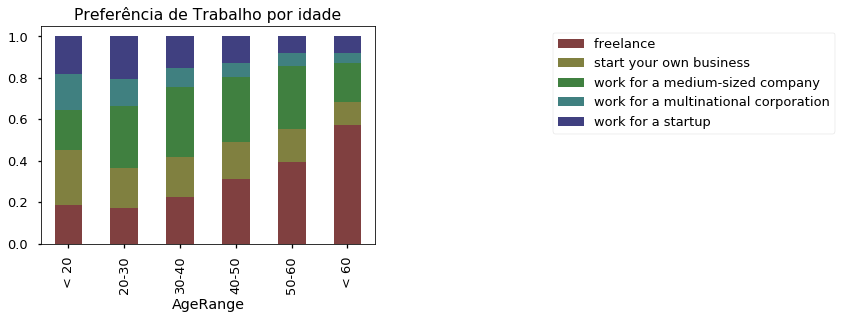

In [11]:
# Quais são as preferências de trabalho por idade?
# Perceba que à medida que a idade aumenta, o interesse por trabalho
# freelance também aumenta, sendo o modelo preferido por profissionais
# acima de 60 anos, profissionais, mais jovem preferem trabalhar em
# Startups ou no seu próprio negócio. Profissionais entre 20 e 50 anos
# preferem trabalhar em empresas de tamanho médio.

# agrupando os dados
# não trabalhar com o dataframe original
# porque se você cometer algum erro durante sua analise
# exploratória seu dataframe original está seguro

df_agerange = df.copy()
# lista de caixas
bins = [0, 20, 30, 40, 50, 60, 100]
# criando uma variável na copy df_agerange

# craindo uma nova coluna no df_agerange
# agrupar com os dados do df_arange['Age']
# com as caixas de etiquetas ['<20', '20-30', '30-40', '50-60', '<60']
df_agerange['AgeRange'] = pd.cut(df_agerange['Age'],
                                bins,
                                labels=['< 20', '20-30', '30-40', '40-50', '50-60', '< 60'])
# criando um novo df2
# tabela em cruz
# variáveis AgeRange, JobPref
df2 = pd.crosstab(df_agerange.AgeRange,
                 df_agerange.JobPref).apply(lambda r: r/r.sum(), axis=1)

# definindo quantidade
num = len(df_agerange.AgeRange.value_counts().index)

# craindo a lista de cores
listaHSV = [(x*1.0/num, 0.5, 0.5) for x in range(num)]
listaRGB = list(map(lambda x: colorsys.hsv_to_rgb(*x), listaHSV))

# gráfico de barras
ax1 = df2.plot(kind = 'bar', stacked = True, color = listaRGB, title = 'Preferência de Trabalho por idade')
lines, labels = ax1.get_legend_handles_labels()
ax1.legend(lines, labels, bbox_to_anchor = (1.51, 1))

Gráfico mostra as prefereências de trabalho por idades mas cada coluna mostra um tipo de trabalho.
A medida que a idade aumente o trabalho freelance aumenta.
Este exemplo mostra tudo que vimos deste o inicio olhando para os dados aplicando uma transformação em outras colunas 

In [12]:
# visualizando o help
help(pd.crosstab)

# pandas.core.reshape.pivot
# pivot é um conceito muito comum em BI, exel é básicamente
# fazer uma perspectiva no seu conjunto de dados olhar os dados
# em outra perspectiva.

Help on function crosstab in module pandas.core.reshape.pivot:

crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, margins_name: str = 'All', dropna: bool = True, normalize=False) -> 'DataFrame'
    Compute a simple cross tabulation of two (or more) factors. By default
    computes a frequency table of the factors unless an array of values and an
    aggregation function are passed.
    
    Parameters
    ----------
    index : array-like, Series, or list of arrays/Series
        Values to group by in the rows.
    columns : array-like, Series, or list of arrays/Series
        Values to group by in the columns.
    values : array-like, optional
        Array of values to aggregate according to the factors.
        Requires `aggfunc` be specified.
    rownames : sequence, default None
        If passed, must match number of row arrays passed.
    colnames : sequence, default None
        If passed, must match number of column arrays passed.

## Realocação por Idade

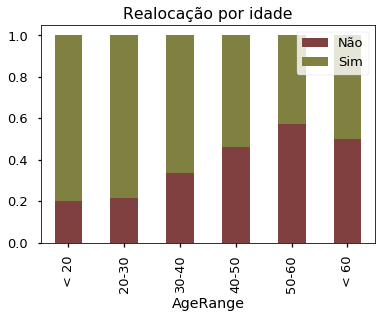

In [14]:
# Qual o objetivo de realocação?
# A vontade de buscar em novo emprego diminui com a idade,
# Quase 80% das pessoas abaixo dos 30 anos estão preparadas para isto.

# Agrupando dados
# crosstab cruzar as duas informação
df3 = pd.crosstab(df_agerange.AgeRange,
                 df_agerange.JobRelocateYesNo).apply(lambda r: r/r.sum(), axis = 1)

# definindo quantidade 
num = len(df_agerange.AgeRange.value_counts().index)

# criando lista de cores
listaHSV = [(x*1.0/num, 0.5, 0.5) for x in range(num)]
listaRGB = list(map(lambda x: colorsys.hsv_to_rgb(*x), listaHSV))

# gráfico de barras
ax1 = df3.plot(kind='bar', stacked=True, color=listaRGB, title='Realocação por idade')
lines, labels=ax1.get_legend_handles_labels()
ax1.legend(lines, ['Não', 'Sim'], loc = 'best')

## Idade x Horas de Aprendizagem

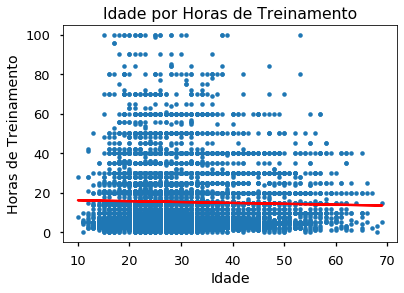

In [18]:
# Qual a relação entre idade e horas de aprendizagem?
# A idade dos profissionais não afeta a quantidade de tempo gasto com
# capacitação e treinamento

import warnings
warnings.filterwarnings('ignore')

# criando subsets dos dados
df4 = df.copy()
# remover os valores missing
df4 = df4.dropna(subset=['HoursLearning'])
# dentro do meu dataframe4 selecionando Age é em intervalo de 0, 70
df4 = df4[df['Age'].isin(range(0, 70))]

# definindo os valores de x e y
x = df4['Age']
y = df4['HoursLearning']

# computando os valores e gerandos gráficos
m, b = np.polyfit(x, y, 1)
# mudando a performace do gráfico para ponto
plt.plot(x, y, '.')
# adicionando uma linha de regressão
plt.plot(x, m*x + b, '-',color = 'red')
plt.xlabel('Idade')
plt.ylabel('Horas de Treinamento')
plt.title('Idade por Horas de Treinamento')
plt.show()

## Investimento em Capacitação X Expectativa Salarial

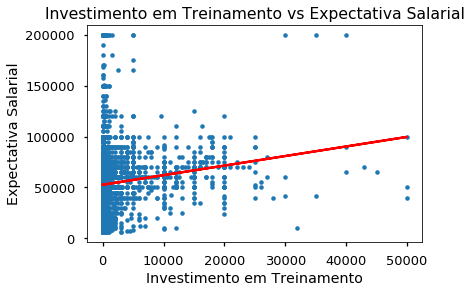

In [20]:
# Qual a relação entre investimento em capacitação e expectativa
# salarial ?
# Os profissionais que investem tempo e dinheiro em capacitação e
# treinamento, em geral conseguem selários mais altos, embora alguns
# profissionais esperem altos salários, investindo 0 em treinamento.

import warnings
warnings.filterwarnings('ignore')

# criando subset de dados
df5 = df.copy()
# dropando os valores missing
df5 = df5.dropna(subset=['ExpectedEarning'])
# isin - é em
df5 = df5[df['MoneyForLearning'].isin(range(0, 60000))]

# definindo valores x, y
x = df5.MoneyForLearning
y = df5.ExpectedEarning

# computando os valores e gerando o gráfico
# ployfit linha de regressão
m, b = np.polyfit(x, y, 1)
plt.plot(x, y, '.')
plt.plot(x, m*x + b, '-', color = 'red')
plt.xlabel('Investimento em Treinamento')
plt.ylabel('Expectativa Salarial')
plt.title('Investimento em Treinamento vs Expectativa Salarial')
plt.show()

Este exercicio é uma base de análise exploratória, é apenas uma visão geral requer muita prática, várias e várias tecnicas.

## Fim